In [1]:
import pandas as pd
import zipfile
from zipfile import *
import matplotlib.pyplot as plt

In [183]:
zf = zipfile.ZipFile('train.csv.zip') 
train_df = pd.read_csv(zf.open('train.csv'))

In [184]:
test_df = pd.read_csv('test.csv')

# Load the stores and oil datasets
stores_df = pd.read_csv('stores.csv')
oil_df = pd.read_csv('oil.csv')

In [185]:
oil_df = pd.read_csv('oil.csv', parse_dates=['date'])
oil_df = oil_df.set_index('date')
oil_df = oil_df.interpolate(method='time')
oil_df=oil_df.reset_index()

In [186]:
oil_df['dcoilwtico'].iloc[0] = oil_df['dcoilwtico'].mean()
oil_df['date'] = oil_df['date'].dt.strftime('%Y-%m-%d')

C:\Users\dathr\AppData\Local\Temp\ipykernel_76532\254267407.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  oil_df['dcoilwtico'].iloc[0] = oil_df['dcoilwtico'].mean()


In [187]:
# Load the holidays and events dataset
holidays_df = pd.read_csv('holidays_events.csv')

In [188]:
# Extract event or holiday from holidays
event_holiday = holidays_df[(holidays_df['type'] == 'Event') | (holidays_df['type'] == 'Holiday')]
# rename to ds and holiday as required
event_holiday = event_holiday[['date', 'type']].rename(columns = {'date': 'ds', 'type': 'holiday'})

In [189]:
train_df = pd.merge(train_df, stores_df, on='store_nbr', how='left')
test_df = pd.merge(test_df, stores_df, on='store_nbr', how='left')
train_df['ds'] = pd.to_datetime(train_df['date'])
test_df['ds'] = pd.to_datetime(test_df['date'])
train_df = train_df.rename(columns={'sales': 'y'})
test_df = test_df.rename(columns={'sales': 'y'})
train_df['family'], unique = pd.factorize(train_df['family'])
test_df['family'], unique = pd.factorize(test_df['family'])

In [190]:
train_df1=train_df[(train_df.date)<'2017-06-15']
val_df=train_df[(train_df.date)>='2017-06-15']

In [191]:
train_df1

,id,date,store_nbr,family,y,onpromotion,city,state,type,cluster,ds
0,0,2013-01-01,1,0,0.000,0,Quito,Pichincha,D,13,2013-01-01
1,1,2013-01-01,1,1,0.000,0,Quito,Pichincha,D,13,2013-01-01
2,2,2013-01-01,1,2,0.000,0,Quito,Pichincha,D,13,2013-01-01
3,3,2013-01-01,1,3,0.000,0,Quito,Pichincha,D,13,2013-01-01
4,4,2013-01-01,1,4,0.000,0,Quito,Pichincha,D,13,2013-01-01
...,...,...,...,...,...,...,...,...,...,...,...
2890399,2890399,2017-06-14,9,28,294.346,0,Quito,Pichincha,B,6,2017-06-14
2890400,2890400,2017-06-14,9,29,95.372,1,Quito,Pichincha,B,6,2017-06-14
2890401,2890401,2017-06-14,9,30,1102.281,2,Quito,Pichincha,B,6,2017-06-14
2890402,2890402,2017-06-14,9,31,2.000,0,Quito,Pichincha,B,6,2017-06-14


In [92]:
val_df

,id,date,store_nbr,family,y,onpromotion,city,state,type,cluster,ds
2890404,2890404,2017-06-15,1,0,3.000,0,Quito,Pichincha,D,13,2017-06-15
2890405,2890405,2017-06-15,1,1,0.000,0,Quito,Pichincha,D,13,2017-06-15
2890406,2890406,2017-06-15,1,2,8.000,1,Quito,Pichincha,D,13,2017-06-15
2890407,2890407,2017-06-15,1,3,2137.000,22,Quito,Pichincha,D,13,2017-06-15
2890408,2890408,2017-06-15,1,4,1.000,0,Quito,Pichincha,D,13,2017-06-15
...,...,...,...,...,...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,28,438.133,0,Quito,Pichincha,B,6,2017-08-15
3000884,3000884,2017-08-15,9,29,154.553,1,Quito,Pichincha,B,6,2017-08-15
3000885,3000885,2017-08-15,9,30,2419.729,148,Quito,Pichincha,B,6,2017-08-15
3000886,3000886,2017-08-15,9,31,121.000,8,Quito,Pichincha,B,6,2017-08-15


In [26]:
 pip install prophet --no-cache-dir

In [125]:
train_df1

,id,date,store_nbr,family,y,onpromotion,city,state,type,cluster,ds
0,0,2013-01-01,1,0,0.000,0,Quito,Pichincha,D,13,2013-01-01
1,1,2013-01-01,1,1,0.000,0,Quito,Pichincha,D,13,2013-01-01
2,2,2013-01-01,1,2,0.000,0,Quito,Pichincha,D,13,2013-01-01
3,3,2013-01-01,1,3,0.000,0,Quito,Pichincha,D,13,2013-01-01
4,4,2013-01-01,1,4,0.000,0,Quito,Pichincha,D,13,2013-01-01
...,...,...,...,...,...,...,...,...,...,...,...
2890399,2890399,2017-06-14,9,28,294.346,0,Quito,Pichincha,B,6,2017-06-14
2890400,2890400,2017-06-14,9,29,95.372,1,Quito,Pichincha,B,6,2017-06-14
2890401,2890401,2017-06-14,9,30,1102.281,2,Quito,Pichincha,B,6,2017-06-14
2890402,2890402,2017-06-14,9,31,2.000,0,Quito,Pichincha,B,6,2017-06-14


In [181]:
test_df

,id,date,store_nbr,family,onpromotion,city,state,type,cluster,ds
0,3000888,2017-08-16,1,0,0,Quito,Pichincha,D,13,2017-08-16
1,3000889,2017-08-16,1,1,0,Quito,Pichincha,D,13,2017-08-16
2,3000890,2017-08-16,1,2,2,Quito,Pichincha,D,13,2017-08-16
3,3000891,2017-08-16,1,3,20,Quito,Pichincha,D,13,2017-08-16
4,3000892,2017-08-16,1,4,0,Quito,Pichincha,D,13,2017-08-16
...,...,...,...,...,...,...,...,...,...,...
28507,3029395,2017-08-31,9,28,1,Quito,Pichincha,B,6,2017-08-31
28508,3029396,2017-08-31,9,29,0,Quito,Pichincha,B,6,2017-08-31
28509,3029397,2017-08-31,9,30,1,Quito,Pichincha,B,6,2017-08-31
28510,3029398,2017-08-31,9,31,9,Quito,Pichincha,B,6,2017-08-31


In [182]:
val_df

,id,date,store_nbr,family,y,onpromotion,city,state,type,cluster,ds
2890404,2890404,2017-06-15,1,0,3.000,0,Quito,Pichincha,D,13,2017-06-15
2890405,2890405,2017-06-15,1,1,0.000,0,Quito,Pichincha,D,13,2017-06-15
2890406,2890406,2017-06-15,1,2,8.000,1,Quito,Pichincha,D,13,2017-06-15
2890407,2890407,2017-06-15,1,3,2137.000,22,Quito,Pichincha,D,13,2017-06-15
2890408,2890408,2017-06-15,1,4,1.000,0,Quito,Pichincha,D,13,2017-06-15
...,...,...,...,...,...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,28,438.133,0,Quito,Pichincha,B,6,2017-08-15
3000884,3000884,2017-08-15,9,29,154.553,1,Quito,Pichincha,B,6,2017-08-15
3000885,3000885,2017-08-15,9,30,2419.729,148,Quito,Pichincha,B,6,2017-08-15
3000886,3000886,2017-08-15,9,31,121.000,8,Quito,Pichincha,B,6,2017-08-15


In [192]:
# initialize an empty DataFrame
concatenated_df = pd.DataFrame(columns=['ds', 'yhat', 'store_nbr'])
concatenated_df_test = pd.DataFrame(columns=['ds', 'yhat', 'store_nbr'])
for i in sorted(train_df["store_nbr"].unique()):
    x=train_df1.loc[(train_df1.store_nbr==i)]
    y=test_df.loc[(test_df.store_nbr==i)]
    m = Prophet(holidays = event_holiday)
    m.fit(x[['ds', 'y']].groupby('ds').sum().reset_index())
    # Make future date
    future = m.make_future_dataframe(periods=62)
    forecast = m.predict(future)
    y_pred=forecast[['ds', 'yhat']].tail(62).reset_index()
    future = m.make_future_dataframe(periods=78)
    forecast = m.predict(future)
    y_pred_test=forecast[['ds', 'yhat']].tail(16).reset_index()
    y_pred1=y_pred.drop(columns=["index"])
    y_pred1["store_nbr"]=i
    y_pred2=y_pred_test.drop(columns=["index"])
    y_pred2["store_nbr"]=i
    # concatenate the two DataFrames along the rows
    concatenated_df = pd.concat([concatenated_df, y_pred1])
    concatenated_df_test = pd.concat([concatenated_df_test, y_pred2])
    # group by 'date' and 'store_nbr' and sum the 'sales' column
result_val = concatenated_df.groupby(['ds', 'store_nbr'])['yhat'].sum().reset_index()
result_test= concatenated_df_test.groupby(['ds', 'store_nbr'])['yhat'].sum().reset_index()

12:37:21 - cmdstanpy - INFO - Chain [1] start processing
12:37:21 - cmdstanpy - INFO - Chain [1] done processing
12:37:23 - cmdstanpy - INFO - Chain [1] start processing
12:37:23 - cmdstanpy - INFO - Chain [1] done processing
12:37:24 - cmdstanpy - INFO - Chain [1] start processing
12:37:24 - cmdstanpy - INFO - Chain [1] done processing
12:37:25 - cmdstanpy - INFO - Chain [1] start processing
12:37:26 - cmdstanpy - INFO - Chain [1] done processing
12:37:27 - cmdstanpy - INFO - Chain [1] start processing
12:37:27 - cmdstanpy - INFO - Chain [1] done processing
12:37:28 - cmdstanpy - INFO - Chain [1] start processing
12:37:28 - cmdstanpy - INFO - Chain [1] done processing
12:37:29 - cmdstanpy - INFO - Chain [1] start processing
12:37:30 - cmdstanpy - INFO - Chain [1] done processing
12:37:31 - cmdstanpy - INFO - Chain [1] start processing
12:37:31 - cmdstanpy - INFO - Chain [1] done processing
12:37:33 - cmdstanpy - INFO - Chain [1] start processing
12:37:33 - cmdstanpy - INFO - Chain [1]

In [106]:
val_df

,id,date,store_nbr,family,y,onpromotion,city,state,type,cluster,ds
2890404,2890404,2017-06-15,1,0,3.000,0,Quito,Pichincha,D,13,2017-06-15
2890405,2890405,2017-06-15,1,1,0.000,0,Quito,Pichincha,D,13,2017-06-15
2890406,2890406,2017-06-15,1,2,8.000,1,Quito,Pichincha,D,13,2017-06-15
2890407,2890407,2017-06-15,1,3,2137.000,22,Quito,Pichincha,D,13,2017-06-15
2890408,2890408,2017-06-15,1,4,1.000,0,Quito,Pichincha,D,13,2017-06-15
...,...,...,...,...,...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,28,438.133,0,Quito,Pichincha,B,6,2017-08-15
3000884,3000884,2017-08-15,9,29,154.553,1,Quito,Pichincha,B,6,2017-08-15
3000885,3000885,2017-08-15,9,30,2419.729,148,Quito,Pichincha,B,6,2017-08-15
3000886,3000886,2017-08-15,9,31,121.000,8,Quito,Pichincha,B,6,2017-08-15


In [193]:
y_actual=val_df[['ds', 'store_nbr','y']].groupby(['ds','store_nbr']).sum().reset_index()

In [206]:
y_actual

,ds,y
0,2017-06-15,6.603383e+05
1,2017-06-16,8.347864e+05
2,2017-06-17,1.096134e+06
3,2017-06-18,9.651441e+05
4,2017-06-19,7.911464e+05
...,...,...
57,2017-08-11,8.263737e+05
58,2017-08-12,7.926305e+05
59,2017-08-13,8.656397e+05
60,2017-08-14,7.609224e+05


In [194]:
result

,ds,store_nbr,yhat
0,2017-06-15,1,11159.652594
1,2017-06-15,2,13398.805620
2,2017-06-15,3,32590.052440
3,2017-06-15,4,11422.800553
4,2017-06-15,5,8696.561833
...,...,...,...
3343,2017-08-15,50,18956.132730
3344,2017-08-15,51,20113.207611
3345,2017-08-15,52,14794.900717
3346,2017-08-15,53,11328.755148


In [195]:
result_test

,ds,store_nbr,yhat
0,2017-08-16,1,12768.894427
1,2017-08-16,2,14117.586577
2,2017-08-16,3,36719.690791
3,2017-08-16,4,12686.314325
4,2017-08-16,5,9545.815262
...,...,...,...
859,2017-08-31,50,19497.196477
860,2017-08-31,51,20390.605742
861,2017-08-31,52,15051.926643
862,2017-08-31,53,11021.275095


In [202]:
y_pred=result_val
y_pred_test=result_test

In [203]:
y_actual=y_actual[['ds','y']].groupby(['ds']).sum().reset_index()
y_pred_val=y_pred[['ds','yhat']].groupby(['ds']).sum().reset_index()
y_pred_test=y_pred_test[['ds','yhat']].groupby(['ds']).sum().reset_index()

In [204]:
y_pred_val

,ds,yhat
0,2017-06-15,7.489357e+05
1,2017-06-16,8.196531e+05
2,2017-06-17,1.010666e+06
3,2017-06-18,1.062763e+06
4,2017-06-19,8.553825e+05
...,...,...
57,2017-08-11,7.835298e+05
58,2017-08-12,9.750143e+05
59,2017-08-13,1.028371e+06
60,2017-08-14,8.229948e+05


In [167]:
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(y_actual['y'].values, result['yhat'].values, squared=False)
mse = mean_squared_error(y_actual['y'].values, result['yhat'].values, squared=True)

In [168]:
print(rmse)

3124.7439566719613


In [19]:
# Make future date
future = m.make_future_dataframe(periods=62)
future

,ds
0,2013-01-01
1,2013-01-02
2,2013-01-03
3,2013-01-04
4,2013-01-05
...,...
1679,2017-08-11
1680,2017-08-12
1681,2017-08-13
1682,2017-08-14


In [210]:
y_pred_val

,ds,yhat
0,2017-06-15,7.489357e+05
1,2017-06-16,8.196531e+05
2,2017-06-17,1.010666e+06
3,2017-06-18,1.062763e+06
4,2017-06-19,8.553825e+05
...,...,...
57,2017-08-11,7.835298e+05
58,2017-08-12,9.750143e+05
59,2017-08-13,1.028371e+06
60,2017-08-14,8.229948e+05


In [222]:

y_pred_test1 = y_pred_test.reset_index(drop=True)
y_pred_test1.index += 61

In [223]:
y_pred_test1

,ds,yhat
61,2017-08-16,8.060591e+05
62,2017-08-17,7.238561e+05
63,2017-08-18,7.988441e+05
64,2017-08-19,9.946574e+05
65,2017-08-20,1.051978e+06
66,2017-08-21,8.501309e+05
67,2017-08-22,8.090939e+05
68,2017-08-23,8.387084e+05
69,2017-08-24,7.561361e+05
70,2017-08-25,8.346906e+05


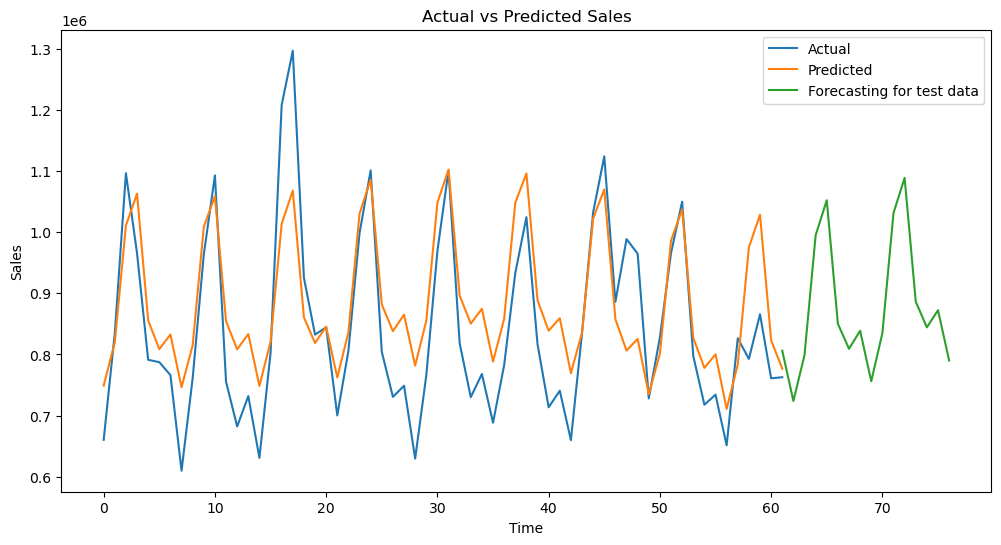

In [229]:
plt.figure(figsize=(12,6))
#plt.plot(y_val.ds.values, label='Train')
plt.plot(y_actual.y.values, label='Actual')
#plt.plot(y_pred.ds.values, label='Test')
plt.plot(y_pred_val.yhat.values, label='Predicted')

plt.plot(y_pred_test1.index,y_pred_test1.yhat.values, label='Forecasting for test data')

plt.title('Actual vs Predicted Sales')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.legend(loc='best')
plt.show()
